# Predicting Credit Card Approvals

Build a machine learning model to predict if a credit card application will get approved.


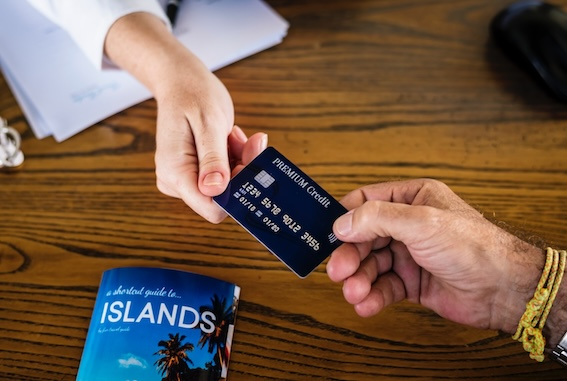

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

## How to approach the project
1. Preprocess the data

2. Prepare the data for modeling

3. Train the model

4. Finding the best scoring model

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [12]:
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [35]:
display(cc_apps.nunique())

0       3
1     350
2     215
3       4
4       4
5      15
6      10
7     132
8       2
9       2
10     23
11      3
12    240
13      2
dtype: int64

In [14]:
display(cc_apps.info())
display(cc_apps.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


None

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [15]:
display(cc_apps.iloc[:, 0].nunique())
display(cc_apps.iloc[:, 0].value_counts())

3

b    468
a    210
?     12
Name: 0, dtype: int64

In [38]:
# Extract the last column of the DataFrame
last_column = cc_apps.iloc[:, -1]
display(last_column.value_counts())

-    383
+    307
Name: 13, dtype: int64

### 1. Preprocess the data

Typical preprocessing techniques include handling missing values with replacement and one-hot encoding. You'll need to take care of how you impute missing values depending on the data type; a for loop may be handy here.

In [21]:
# Simplified code to list all records containing "?" in cc_apps
records_with_question_mark_before= cc_apps[cc_apps.apply(lambda row: row.astype(str).str.contains(r'\?').any(), axis=1)]
records_with_question_mark_before

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
83,a,?,3.500,u,g,d,v,3.000,t,f,0,g,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,s,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,g,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,s,0,-
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,p,0,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,g,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,g,2010,-
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,p,0,+
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,g,105,-
327,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,s,0,-


In [22]:
display(records_with_question_mark_before.shape) #all
display(records_with_question_mark_before.shape[0]) #row
display(records_with_question_mark_before.shape[1]) #column

(31, 14)

31

14

In [24]:
# check to see '?' after replacing the value
records_with_question_mark_after = cc_apps_nans_replaced[cc_apps_nans_replaced.apply(lambda row: row.astype(str).str.contains(r'\?').any(), axis=1)]
records_with_question_mark_after

,0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [25]:
display(records_with_question_mark_after.shape) #all
display(records_with_question_mark_after.shape[0]) #row
display(records_with_question_mark_after.shape[1]) #column

(0, 14)

0

14

In [23]:
# Replace '?' with NaN in cc_apps dataset
cc_apps_nans_replaced = cc_apps.replace('?', np.NaN)

# Display the first few rows to confirm the replacement
display(cc_apps_nans_replaced)
display(cc_apps_nans_replaced.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


(690, 14)

In [26]:
# Create a copy of the NaN replacement DataFrame
cc_apps_imputed = cc_apps_nans_replaced.copy()
cc_apps_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [27]:
cc_apps_imputed.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12      int64
13     object
dtype: object

In [29]:
# list object & non-object columns
object_columns = []
non_object_columns = []

for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        object_columns.append(col)
    else:
        non_object_columns.append(col)

display("Object columns:", object_columns)
display("Non-object columns:", non_object_columns)

'Object columns:'

[0, 1, 3, 4, 5, 6, 8, 9, 11, 13]

'Non-object columns:'

[2, 7, 10, 12]

In [30]:
# Iterate over each column of cc_apps_nans_replaced and impute the most frequent value for object data types and the mean for numeric data types
for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        # Impute with the most frequent value (using index[0] as the 1st top)
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(
            cc_apps_imputed[col].value_counts().index[0]
        )
    else:
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(cc_apps_imputed[col].mean())

# Dummify the categorical features        
cc_apps_encoded = pd.get_dummies(cc_apps_imputed, drop_first=True)
cc_apps_encoded

,2,7,10,12,0_b,1_15.17,1_15.75,1_15.83,1_15.92,1_16.00,1_16.08,1_16.17,1_16.25,1_16.33,1_16.50,1_16.92,1_17.08,1_17.25,1_17.33,1_17.42,1_17.50,1_17.58,1_17.67,1_17.83,1_17.92,1_18.00,1_18.08,1_18.17,1_18.25,1_18.33,1_18.42,1_18.50,1_18.58,1_18.67,1_18.75,1_18.83,1_18.92,1_19.00,1_19.17,1_19.33,...,1_65.42,1_67.75,1_68.67,1_69.17,1_69.50,1_71.58,1_73.42,1_74.83,1_76.75,1_80.25,3_u,3_y,4_gg,4_p,5_c,5_cc,5_d,5_e,5_ff,5_i,5_j,5_k,5_m,5_q,5_r,5_w,5_x,6_dd,6_ff,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_p,11_s,13_-
0,0.000,1.25,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,4.460,3.04,6,560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
2,0.500,1.50,0,824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1.540,3.75,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
4,5.625,1.71,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
686,0.750,2.00,2,394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
687,13.500,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
688,0.205,0.04,0,750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [31]:
display(cc_apps_encoded.shape)

(690, 383)

### 2. Prepare the data for modeling

Define the target and feature variables, then split and scale the data to prepare it for modeling. Splitting the data allows you to train the model on one set and evaluate the performance on a separate set.

In [32]:
# Extract the last column as your target variable
X = cc_apps_encoded.iloc[:, :-1].values # get all columns but the last one
y = cc_apps_encoded.iloc[:, [-1]].values # get the last column

print(X[:5])
print(y[:5])
print(X.shape, y.shape)

[[0.    1.25  1.    ... 1.    0.    0.   ]
 [4.46  3.04  6.    ... 1.    0.    0.   ]
 [0.5   1.5   0.    ... 0.    0.    0.   ]
 [1.54  3.75  5.    ... 1.    0.    0.   ]
 [5.625 1.71  0.    ... 0.    0.    1.   ]]
[[0]
 [0]
 [0]
 [0]
 [0]]
(690, 382) (690, 1)


### 3. Train the model

Once the data is ready, you can apply one or many supervised machine learning models to the training data and see how they perform. This process involves instantiating a model, fitting it to the data and generating and evaluating the predictions.

In [33]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state=42)

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train_scaled, y_train)

# Use logreg to predict instances from the training set
y_train_pred = logreg.predict(X_train_scaled)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_train, y_train_pred))

[[70  0]
 [ 0 68]]


#### Based on the confusion matrix Result:

1. True Positive -> 70
2. True Negative -> 68 

### 4. Finding the best scoring model

Perform grid search cross validation to iterate through different parameters and find the best model for your training data.

In [34]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(X_train_scaled, y_train)

# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
best_score =  best_model.score(X_test_scaled, y_test)

print("Accuracy of logistic regression classifier: ", best_score)

Best: 0.768254 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8532608695652174
